# ZNE


Zero-noise extrapolation (ZNE) is a noise mitigation technique. It works by intentionally scaling the noise of a quantum circuit to then extrapolate the zero-noise limit of an observable of interest. In this task, you will build a simple ZNE function from scratch:



1. Build a simple noise model with depolarizing noise 


2. Create different circuits to test your noise models and choose the observable to measure 



3. Apply the unitary folding method. 


4. Apply the extrapolation method to get the zero-noise limit. Different extrapolation methods achieve different results, such as Linear, polynomial, and exponential.


5. Compare mitigated and unmitigated results 


Bonus: Run your ZNE function in real quantum hardware through the IBM Quantum Service


Check the Mitiq documentation for references. You are not allowed to use the functions from Mitiq or any other frameworks where ZNE is already implemented.

# Step 1
Building a simple noise model with depolarising noise

In [321]:
import qiskit
from qiskit.test.ibmq_mock import mock_get_backend
from qiskit_aer import Aer
from qiskit import IBMQ, QuantumCircuit, execute
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel
from mitiq import zne
from mitiq.interface.mitiq_qiskit.qiskit_utils import initialized_depolarizing_noise

In [322]:
USE_REAL_HARDWARE = False

In [323]:
from qiskit_aer.noise import NoiseModel
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error

noise_model = NoiseModel()

# Add depolarizing error to all single qubit u1, u2, u3 gates
error = depolarizing_error(0.1, 1)
noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])
 
# Print noise model info
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'u2', 'u1']
  All-qubits errors: ['u1', 'u2', 'u3']


In [307]:
#from qiskit_aer.noise import NoiseModel
#from qiskit.providers.aer.noise import NoiseModel, depolarizing_error

#noise_model = NoiseModel()

#def execute(circuit, noise_level=0.010):
    
    #return circuit
  

In [271]:
#print (noise_model)

NoiseModel: Ideal


# Step 2
Create different circuits to test your noise models and choose the observable to measure

In [324]:
from qiskit_aer.noise import NoiseModel
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error


n_qubits = 2
depth_circ = 100
shots = 10**4
noise_model = NoiseModel()

circ = QuantumCircuit(n_qubits)
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
    circ.measure_all()
#print(circ)

def execute(circ, noise_level=0.005):
    noisy_circuit = circuit.with_noise(depolarize(p=noise_level))
    
    return circuit


    
    

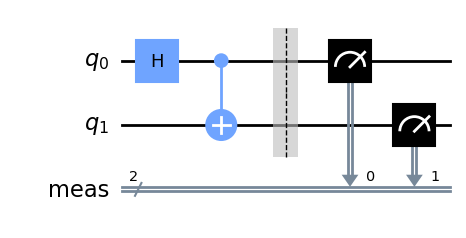

In [325]:
circ.draw(output='mpl',style="clifford")

In [277]:
#noise_model = initialized_depolarizing_noise(noise_level=0.02)
#job = qiskit.execute(backend=Aer.get_backend("qasm_simulator"),
            #noise_model=noise_model,
            #basis_gates=noise_model.basis_gates,
            #optimization_level=0,  # Important to preserve folded gates.        

  
# Convert from raw measurement counts to the expectation value
#counts = job.result().get_counts()
#if counts.get("0") is None:
    #expectation_value = 0.
#else:
    #expectation_value = counts.get("0") / shots

#return expectation_value

In [251]:
#from qiskit.tools.visualization import plot_histogram
#plot_histogram(circ)

# Step 3
Apply unitary folding method

In [252]:
#noise_scaling_function = zne.scaling.fold_global

In [253]:
#noise_scaled_circ = noise_scaling_function(circ, scale_factor=2)


#print(f"The input circuit has {len(circ)} gates")
#print(f"The scaled circuit has {len(noise_scaled_circ)} gates")

In [326]:
scaled_circuit = zne.scaling.fold_gates_at_random(circ, scale_factor=4)#local folding
print("Locally folded circuit:", scaled_circuit, sep="\n")


Locally folded circuit:
        ┌───┐┌───┐┌───┐┌───┐┌───┐               ┌─┐   
   q_0: ┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├──■────■────■──┤M├───
        └───┘└───┘└───┘└───┘└───┘┌─┴─┐┌─┴─┐┌─┴─┐└╥┘┌─┐
   q_1: ─────────────────────────┤ X ├┤ X ├┤ X ├─╫─┤M├
                                 └───┘└───┘└───┘ ║ └╥┘
meas: 2/═════════════════════════════════════════╩══╩═
                                                 0  1 


In [327]:
scaled_circuit = zne.scaling.fold_global(circ, scale_factor=4)#global folding
print("Globally folded circuit:", scaled_circuit, sep="\n")

Globally folded circuit:
        ┌───┐          ┌───┐┌───┐               ┌─┐   
   q_0: ┤ H ├──■────■──┤ H ├┤ H ├──■────■────■──┤M├───
        └───┘┌─┴─┐┌─┴─┐└───┘└───┘┌─┴─┐┌─┴─┐┌─┴─┐└╥┘┌─┐
   q_1: ─────┤ X ├┤ X ├──────────┤ X ├┤ X ├┤ X ├─╫─┤M├
             └───┘└───┘          └───┘└───┘└───┘ ║ └╥┘
meas: 2/═════════════════════════════════════════╩══╩═
                                                 0  1 


In [240]:
#scaled_circuit = zne.scaling.fold_gates_at_random(circuit, scale_factor=3)
#print("Locally folded circuit:", scaled_circuit, sep="\n")

# Step 4
Apply the extrapolation method to get the zero-noise limit. Different extrapolation methods achieve different results, such as Linear, polynomial, and exponential.

In [334]:
#factory = zne.inference.AdaExpFactory(steps=10, asymptote=0.25)
factory = zne.inference.ExpFactory(scale_factors=[1, 2, 3], asymptote=0.25)
# Examples:

#Richardson extrapolation
#factory = zne.inference.RichardsonFactory(scale_factors = [1, 2, 3])

 #Exponential extrapolation
#factory = zne.inference.ExpFactory(scale_factors = [1, 2, 3], asymptote=0.25)

# Exponential adaptive extrapolation
# factory = zne.inference.AdaExpFactory(steps=10, asymptote=0.25)

In [319]:
#from mitiq import zne
# Default extrapolation method in Mitiq
#richardson_factory = zne.inference.RichardsonFactory(scale_factors=[1, 2, 3])

# Step 5
Compare Mitigated and unmitigated results

In [335]:

unmitigated = ibmq_executor(circuit)
mitigated = zne.execute_with_zne(circuit, ibmq_executor)
print(f"Unmitigated result {unmitigated:.3f}")
print(f"Mitigated result {mitigated:.3f}")

Unmitigated result 0.907
Mitigated result 1.012


In [302]:
#from qiskit import IBMQ

#provider = IBMQ.enable_account('bb79f1dce344c6350c03b54cebef427427eeda3cd21e206b8d52f9992255fe3553f98b09b58b7a3d6667d2292541685ac115e9776de1376086184c5cd669baeb')
#backend = provider.get_backend('ibmq_qasm_simulator')

In [158]:
import qiskit
from qiskit.test.ibmq_mock import mock_get_backend
from qiskit_aer import Aer
from qiskit_ibm_provider import IBMProvider

from mitiq import zne
from mitiq.interface.mitiq_qiskit.qiskit_utils import initialized_depolarizing_noise

In [159]:
USE_REAL_HARDWARE = False

In [160]:
qreg, creg = qiskit.QuantumRegister(1), qiskit.ClassicalRegister(1)
circuit = qiskit.QuantumCircuit(qreg, creg)
for _ in range(10):
    circuit.x(qreg)
circuit.measure(qreg, creg)
print(circuit)

      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
 q38: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤M├
      └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└╥┘
c1: 1/═══════════════════════════════════════════════════╩═
                                                         0 


In [161]:
if IBMProvider.saved_accounts() and USE_REAL_HARDWARE:
    provider = IBMProvider()
    backend = provider.get_backend("ibmq_qasm_simulator")  # Set quantum computer here!
else:
    # Default to a simulator.
    backend = Aer.get_backend("qasm_simulator"),


def ibmq_executor(circuit: qiskit.QuantumCircuit, shots: int = 8192) -> float:
    """Returns the expectation value to be mitigated.

    Args:
        circuit: Circuit to run.
        shots: Number of times to execute the circuit to compute the expectation value.
    """
    if USE_REAL_HARDWARE:
        # Run the circuit on hardware
        job = qiskit.execute(
            experiments=circuit,
            backend=backend,
            optimization_level=0,  # Important to preserve folded gates.
            shots=shots
        )
    else:
        # Simulate the circuit with noise
        noise_model = initialized_depolarizing_noise(noise_level=0.02)
        job = qiskit.execute(
            experiments=circuit,
            backend=Aer.get_backend("qasm_simulator"),
            noise_model=noise_model,
            basis_gates=noise_model.basis_gates,
            optimization_level=0,  # Important to preserve folded gates.
            shots=shots,
        )

    # Convert from raw measurement counts to the expectation value
    counts = job.result().get_counts()
    if counts.get("0") is None:
        expectation_value = 0.
    else:
        expectation_value = counts.get("0") / shots
    return expectation_value

In [162]:
unmitigated = ibmq_executor(circuit)
mitigated = zne.execute_with_zne(circuit, ibmq_executor)
print(f"Unmitigated result {unmitigated:.3f}")
print(f"Mitigated result {mitigated:.3f}")

Unmitigated result 0.909
Mitigated result 0.967


In [163]:
linear_factory = zne.inference.LinearFactory(scale_factors=[1.0, 1.5, 2.0, 2.5, 3.0])
mitigated = zne.execute_with_zne(circuit, ibmq_executor, factory=linear_factory)
print(f"Mitigated result {mitigated:.3f}")

Mitigated result 0.965


In [164]:
mitigated = zne.execute_with_zne(circuit, ibmq_executor, scale_noise=zne.scaling.fold_global)
print(f"Mitigated result {mitigated:.3f}")

Mitigated result 1.024
